Import the neccessary libraries

import the neccessary libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Data Loading and Initial Inspection

In [50]:
print("-----Data Loading and Initial Inspection-----")

# Load the customer data, which contains the target variable 'label'ArithmeticError
try:
    df = pd.read_csv("customer_data.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'customer_data.csv' not found. Please ensure the file is in the correct path")
    exit()

df

-----Data Loading and Initial Inspection-----
Data loaded successfully!


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


Data Preprocessing

In [51]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

Missing Values
label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [52]:
# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Dupliacted Rows")
print(df_duplicated)

Dupliacted Rows
0


In [53]:
# Drop rows with missing values
#df = df.dropna(inplace=True)

Feature Engineering

In [54]:
# Identify the target variable (y) and feature set(X)
X = df[["fea_1","fea_2","fea_3","fea_4","fea_5","fea_6","fea_7","fea_8","fea_9","fea_10"]]
y = df["label"]

# Identify column type for different preprocessing steps
numerical_features = ['fea_2', 'fea_4']  # Removed 'fea_11' if not present in X
categorical_features = ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10']

# Handle missing values (Imputation)
# Fill missing values in numerical columns with the median
# Fill missing values in categorical columns with the mode (most frequent value)
for col in numerical_features:
    df[col].fillna(df[col].median(), inplace=True)
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Define preprocessing steps using ColumnTransformer for cleaner code and consistency
# Numerical Pipeline: Impute missing values with the median and then scale (StandardScaler)
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical Pipeline: Impute missing values with the most frequent values and then encode
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="passthrough" # Keep other columns (if any) as they are
)

# Apply processing to the features
X_processed = preprocessor.fit_transform(X)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7756\1288042992.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7756\1288042992.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Data Splitting

In [55]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_processed,y,random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 843 samples
Testing set size: 282 samples


Visualization before training

C:\Users\Dell\AppData\Local\Temp\ipykernel_7756\2520609352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y,palette="viridis")


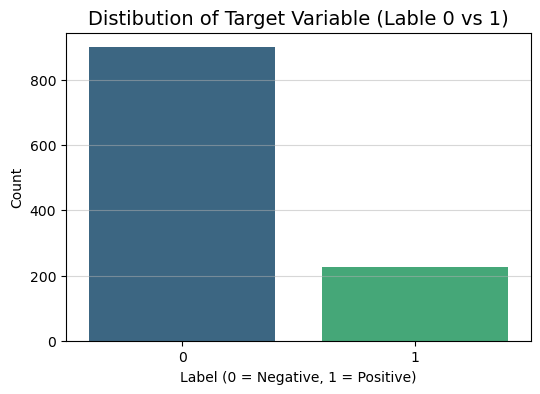

In [56]:
# Visualization 1: Target Variable Distribution (Checking the class imbalance)
plt.figure(figsize=(6,4))
sns.countplot(x=y,palette="viridis")
plt.title("Distibution of Target Variable (Lable 0 vs 1)",fontsize=14)
plt.xlabel("Label (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.grid(axis="y",alpha=0.5)
plt.show()

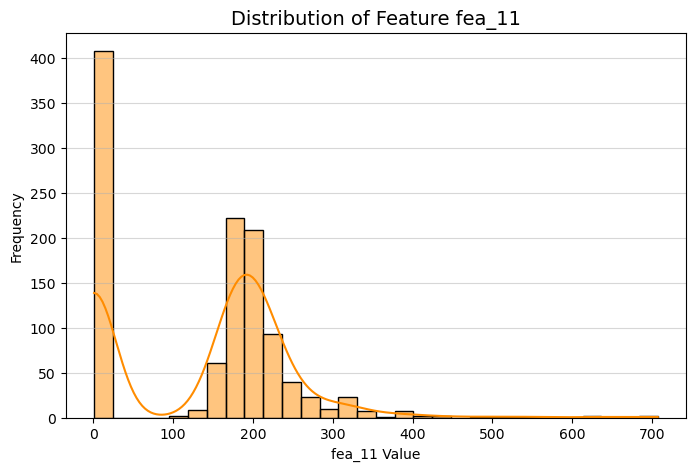

In [57]:
# Visualization 2: Feature Distibution (Example of a numerical feature)
plt.figure(figsize=(8,5))
sns.histplot(df["fea_11"],kde=True,bins=30,color='darkorange')
plt.title("Distribution of Feature fea_11",fontsize=14)
plt.xlabel("fea_11 Value")
plt.ylabel("Frequency")
plt.grid(axis="y",alpha=0.5)
plt.show()

Model Training and Comparison

-----Model Training and Comparison-----
Training Logistic Regression.....
Model: Logistic Regression
Accuracy: 0.7801
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       219
           1       1.00      0.02      0.03        63

    accuracy                           0.78       282
   macro avg       0.89      0.51      0.45       282
weighted avg       0.83      0.78      0.69       282

Training K-Nearest Neighbors.....
Model: K-Nearest Neighbors
Accuracy: 0.7553
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       219
           1       0.31      0.08      0.13        63

    accuracy                           0.76       282
   macro avg       0.55      0.51      0.49       282
weighted avg       0.68      0.76      0.69       282

Training Support Vector Machine.....
Model: Support Vector Machine
Accuracy: 0.7766
              precision    recall  f1-score   support

           

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest
Accuracy: 0.7766
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       219
           1       0.00      0.00      0.00        63

    accuracy                           0.78       282
   macro avg       0.39      0.50      0.44       282
weighted avg       0.60      0.78      0.68       282



c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


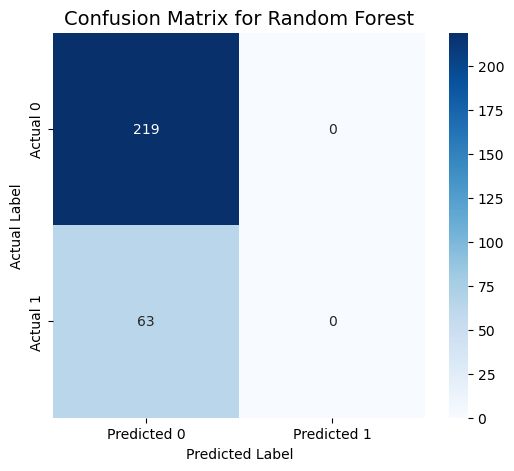

In [58]:
print("-----Model Training and Comparison-----")

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear",random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(random_state=42,probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42,max_depth=5), # Limiting the dept of Overfitting
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42,max_depth=10)
}


results = {} # Dictionary to store the model

# Loop through models, train them and evaluate performance
for name,model in models.items():
    print(f"Training {name}.....")

    # Train the model using the preprocessed training data
    model.fit(X_train,y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy

    # Print the performance report
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")

    # Print the classification report
    print(classification_report(y_test,y_pred))

    # Plot the confusion matrix of one of the models (Random Forest)
    if name == "Random Forest":
        plt.figure(figsize=(6,5)),
        cm = confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
                    xticklabels=["Predicted 0","Predicted 1"],
                    yticklabels=["Actual 0","Actual 1"]

        )
        plt.title(f"Confusion Matrix for {name}",fontsize=14)
        plt.ylabel("Actual Label")
        plt.xlabel("Predicted Label")
        plt.show()

In [59]:
# Determine the best model
best_model_name = max(results,key=results.get)
best_model = models[best_model_name]

print("-----Best Model Selection-----")
print(f"The best performing model based on Accuracy is: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

-----Best Model Selection-----
The best performing model based on Accuracy is: Logistic Regression with Accuracy: 0.7801


Visualization after training

-----Visualization After Training-----


C:\Users\Dell\AppData\Local\Temp\ipykernel_7756\1544540577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy",y="Model",data=results_df,palette="crest")


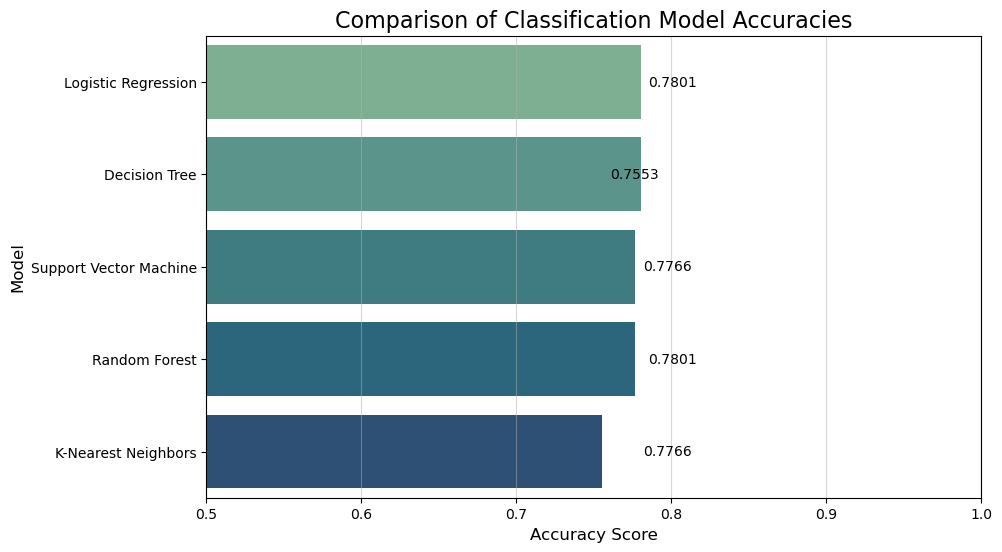

In [60]:
print("-----Visualization After Training-----")

# Create a DataFrame for easy plotting of results
results_df = pd.DataFrame(results.items(),columns=["Model","Accuracy"])
results_df = results_df.sort_values(by="Accuracy",ascending=False)

# Bar Chart of Model Accuracies
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy",y="Model",data=results_df,palette="crest")
plt.title("Comparison of Classification Model Accuracies",fontsize=16)
plt.xlabel("Accuracy Score",fontsize = 12)
plt.ylabel("Model",fontsize = 12)
plt.xlim(0.5,1.0) # Set a reasonable x-limit for classification accuracy
plt.grid(axis="x",alpha=0.5)

# Highlight the best model
for index, row in results_df.iterrows():
    plt.text(row['Accuracy'] + 0.005, index, f"{row['Accuracy']:.4f}", color='black', ha="left", va="center")

plt.show()